<a href="https://colab.research.google.com/github/GauravPatel89/EVA-Track3-Assignments/blob/master/Session9/Assignment9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import neceesary modules

from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

import cv2

Using TensorFlow backend.


In [2]:
# Import and load cifar10 dataset

from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

170500096/170498071 [==============================] - 3s 0us/step


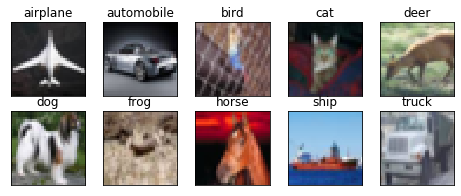

In [3]:
# Display randomly selected examples from each of the classes

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
# Define a function to plot training and test accuracies and losses during the training

def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))   # define a plot with 1 row and 2 columns of subplots
    
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss') 
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
# define a function to calculate accuracy based on passed model, test data and test labels
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
# Stadandardize the data by converting it to float32 and dividing by max pixel value 255
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255

# convert class labels to binary class labels in one hot encoding
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

## Assignment Part 1
Following is the optimized model from assignment 6A

In [7]:
# Define the model
model = Sequential()

model.add(Convolution2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),) #  RF=3x3    o/p dim=32x32X32   kernel=3x3x3x32
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.1))              # 10% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=5x5    o/p dim=32x32x64   kernel=3x3x32x64
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.1))              # 10% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=7x7    o/p dim=32x32x128   kernel=3x3x64x128
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.15))             # 15% DropOut

model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=14x14  o/p dim=16x16x128     
model.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=14x14  o/p dim=16x16x32    kernel=1x1x128x32
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.15))             # 15% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=16x16  o/p dim=16x16x64    kernel=3x3x32x64        
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.20))             # 20% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=18x18  o/p dim=16x16x128   kernel=3x3x64x128
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.20))             # 20% DropOut

model.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=36x36  o/p dim=8x8x128      
model.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=36x36  o/p dim=8x8x32      kernel=1x1x128x32    
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.25))             # 25% DropOut

model.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=38x38  o/p dim=8x8x64      kernel=3x3x32x64 
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.30))             # 30% DropOut

model.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=40x40  o/p dim=8x8x128     kernel=3x3x64x128 
model.add(BatchNormalization())      # Batch Normalization
model.add(Activation('relu'))        # Relu activation
model.add(Dropout(0.30))             # 30% DropOut

model.add(GlobalAveragePooling2D())
model.add(Dense(num_classes, activation='softmax'))















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [8]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 32)        128       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 32, 32, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
activation_2 (Activation)    (None, 32, 32, 64)       

In [0]:
# Use keras ImageDataGenerator to obtain normalized training and testing data batches

from keras.preprocessing.image import ImageDataGenerator

# Initialize ImageDataGenerator for image normalization for training
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of training data eg. mean, std
datagen.fit(train_features)

# Define batch size
BS=128
# Generate an iterator for training. It will provide nomalized image data of size BS for training
train_iterator = datagen.flow(train_features, train_labels, batch_size = BS)


# Since we will train the model on normalized image data we must used normalized images for validation as well
# Initialize ImageDataGenerator for image normalization for testing
datagenTest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of testing data eg. mean, std
datagenTest.fit(test_features)

# Generate an iterator for training. It will provide nomalized image data of size BS for testing
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = BS)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
390/390 [==============================] - 20s 51ms/step - loss: 1.3909 - acc: 0.4886 - val_loss: 1.7632 - val_acc: 0.3915
Epoch 2/50
390/390 [==============================] - 15s 37ms/step - loss: 1.0182 - acc: 0.6342 - val_loss: 1.2933 - val_acc: 0.5314
Epoch 3/50
390/390 [==============================] - 15s 37ms/step - loss: 0.8903 - acc: 0.6820 - val_loss: 0.9930 - val_acc: 0.6420
Epoch 4/50
390/390 [==============================] - 15s 37ms/step - loss: 0.8032 - acc: 0.7148 - val_loss: 0.9138 - val_acc: 0.6806
Epoch 5/50
390/390 [==============================] - 15s 37ms/step - loss: 0.7426 - acc: 0.7381 - val_loss: 0.8057 - val_acc: 0.7112
Epoch 6/50
390/390 [==============================] - 15s 37ms/step - loss: 0.6972 - acc: 0.7562 - val_loss: 0.7617 - val_acc: 0.7304
Epoch 7/50
390/390 [==============================] - 15s 37ms/step - loss: 0.6561 - acc: 0.7709 -

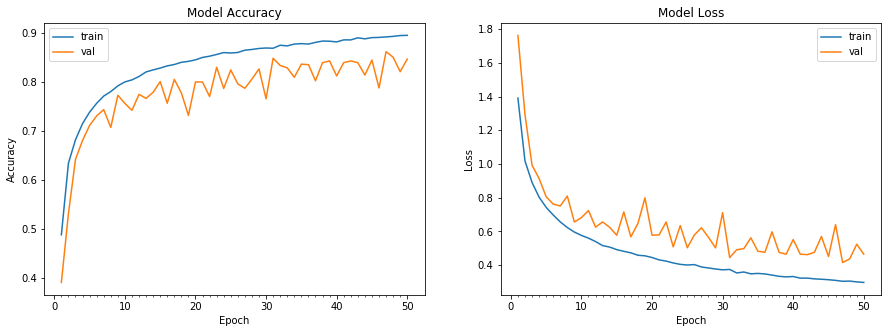

In [0]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


start = time.time()

# Train the model
# argument 'steps_per_epoch' defines how many times train_iterator will be asked for batches of training data
# argument 'validation_steps' defines how many times test_iterator will be asked for batches of validation data
# here validation is being performed in batches instead of one shot to avoid using up too much memory while training
model_info = model.fit_generator(train_iterator, steps_per_epoch = (len(train_features)//BS), epochs = 50, 
                                 validation_data = test_iterator, validation_steps = (len(test_features)//BS),verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)


In [10]:
from google.colab import drive
  
# mount google drive to save  model
drive.mount('/content/gdrive')


fileNameWholeModel = '/content/gdrive/My Drive/TSAI/Session9/FinalModel.h5'


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# Save the trained model
model.save(fileNameWholeModel,overwrite=True)

In [11]:
from keras.models import load_model

model = load_model(fileNameWholeModel)
# Since we have trained our model on Normalized input images, we must normalize the test data before predicting test accuracy
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = test_features.shape[0],shuffle=False)

# Obtain a batch a normalized test data
batchX, batchY = test_iterator.next()

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(batchX, batchY, model))



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Accuracy on test data is: 84.70


## Assignment part 2
In this part we have to incorporate cutout in our model training. This doesn't require redefinition of the model so we can use the same model as part 1. Cutout augmentation will be implemented by image data generator. 

In [0]:
# Define the model
model2 = Sequential()

model2.add(Convolution2D(32, (3, 3), padding='same', input_shape=(32, 32, 3)),) #  RF=3x3    o/p dim=32x32X32   kernel=3x3x3x32
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.1))              # 10% DropOut

model2.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=5x5    o/p dim=32x32x64   kernel=3x3x32x64
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.1))              # 10% DropOut

model2.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=7x7    o/p dim=32x32x128   kernel=3x3x64x128
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.15))             # 15% DropOut

model2.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=14x14  o/p dim=16x16x128     
model2.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=14x14  o/p dim=16x16x32    kernel=1x1x128x32
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.15))             # 15% DropOut

model2.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=16x16  o/p dim=16x16x64    kernel=3x3x32x64        
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.20))             # 20% DropOut

model2.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=18x18  o/p dim=16x16x128   kernel=3x3x64x128
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.20))             # 20% DropOut

model2.add(MaxPooling2D(pool_size=(2, 2)))        # MaxPooling                 #  RF=36x36  o/p dim=8x8x128      
model2.add(Convolution2D(32, 1, padding='same'))  # 1x1 Conv                   #  RF=36x36  o/p dim=8x8x32      kernel=1x1x128x32    
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.25))             # 25% DropOut

model2.add(Convolution2D(64, (3, 3), padding='same'))                          #  RF=38x38  o/p dim=8x8x64      kernel=3x3x32x64 
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.30))             # 30% DropOut

model2.add(Convolution2D(128, (3, 3), padding='same'))                         #  RF=40x40  o/p dim=8x8x128     kernel=3x3x64x128 
model2.add(BatchNormalization())      # Batch Normalization
model2.add(Activation('relu'))        # Relu activation
model2.add(Dropout(0.30))             # 30% DropOut

model2.add(GlobalAveragePooling2D())
model2.add(Dense(num_classes, activation='softmax'))















Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.



In [0]:
# Define the cutout eraser. The eraser function will apply cutouts of
# random size, proportion and aspect ratios

def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
  """ It returns eraser function to apply cutout on input image

    Parameters:
    p   : probability of cutout application
    s_l : min cutout area proportion
    s_h : max cutout area proportion
    r_1 : min aspect ratio
    r_2 : max aspect ratio
    v_l : min value for erased area
    v_h : max value for erased area
    pixel_level(bool) : whether to apply random pixel values in cutout area

    Returns:
    eraser function which applies cutout to the input image.

   """

    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

In [0]:
# Use keras ImageDataGenerator to obtain normalized training and testing data batches

from keras.preprocessing.image import ImageDataGenerator

# define the cutout eraser with probability of cutout 50%, min and max cutout area proportions 0.02 and 0.4
# Min and max aspect ratios 0.3 and 1/0.3, min and max values for erased areas as 0.0 and 1.0
eraser = get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3,
                  v_l=0.0, v_h=1.0, pixel_level=False)

# Initialize ImageDataGenerator for image normalization for training
datagen = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False,preprocessing_function=eraser)

# Learn stats of training data eg. mean, std
datagen.fit(train_features)

# Define batch size
BS=128
# Generate an iterator for training. It will provide nomalized image data of size BS for training
train_iterator = datagen.flow(train_features, train_labels, batch_size = BS)


# Since we will train the model on normalized image data we must used normalized images for validation as well
# Initialize ImageDataGenerator for image normalization for testing
datagenTest = ImageDataGenerator(featurewise_center=True, featurewise_std_normalization=True, zoom_range=0.0, 
                             horizontal_flip=False)

# Learn stats of testing data eg. mean, std
datagenTest.fit(test_features)

# Generate an iterator for training. It will provide nomalized image data of size BS for testing
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = BS)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/50
390/390 [==============================] - 55s 142ms/step - loss: 1.4736 - acc: 0.4574 - val_loss: 1.2011 - val_acc: 0.5682
Epoch 2/50
390/390 [==============================] - 51s 130ms/step - loss: 1.1136 - acc: 0.6017 - val_loss: 1.2086 - val_acc: 0.5764
Epoch 3/50
390/390 [==============================] - 51s 130ms/step - loss: 0.9936 - acc: 0.6445 - val_loss: 1.2448 - val_acc: 0.5674
Epoch 4/50
390/390 [==============================] - 51s 130ms/step - loss: 0.9162 - acc: 0.6721 - val_loss: 1.1489 - val_acc: 0.5996
Epoch 5/50
390/390 [==============================] - 51s 130ms/step - loss: 0.8545 - acc: 0.6976 - val_loss: 0.8322 - val_acc: 0.7003
Epoch 6/50
390/390 [==============================] - 51s 130ms/step - loss: 0.8092 - acc: 0.7154 - val_loss: 0.8169 - val_acc: 0.7150
Epoch 7/50
390/390 [==============================] - 51s 130ms/step - loss: 0.7675 - acc: 0

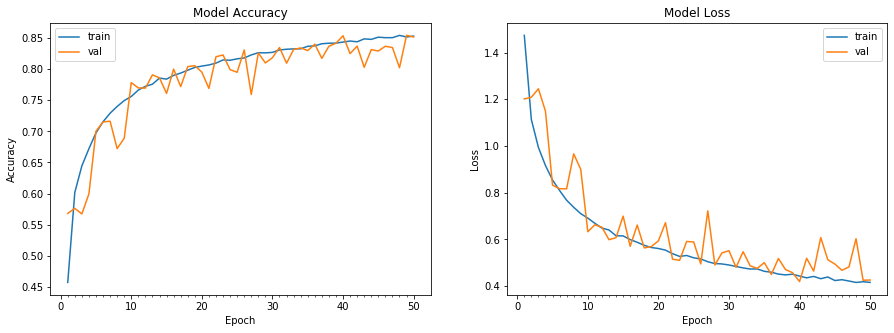

In [0]:
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


start = time.time()

# Train the model
# argument 'steps_per_epoch' defines how many times train_iterator will be asked for batches of training data
# argument 'validation_steps' defines how many times test_iterator will be asked for batches of validation data
# here validation is being performed in batches instead of one shot to avoid using up too much memory while training
model_info = model2.fit_generator(train_iterator, steps_per_epoch = (len(train_features)//BS), epochs = 50, 
                                 validation_data = test_iterator, validation_steps = (len(test_features)//BS),verbose=1)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))

# plot model history
plot_model_history(model_info)


In [0]:
from google.colab import drive
  
# mount google drive to save  model
drive.mount('/content/gdrive')


fileNameWholeModelCutout = '/content/gdrive/My Drive/TSAI/Session9/FinalModelCutout.h5'



Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
model2.save(fileNameWholeModelCutout,overwrite=True)

In [0]:
from keras.models import load_model

model2 = load_model(fileNameWholeModelCutout)
# Since we have trained our model on Normalized input images, we must normalize the test data before predicting test accuracy
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = test_features.shape[0],shuffle=False)

# Obtain a batch a normalized test data
batchX, batchY = test_iterator.next()

# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(batchX, batchY, model))

Accuracy on test data is: 85.11


At this point we models without and with cutouts trained and saved. So now we proceed with implementation of GradCam algorithm. After implementing GradCam we will compare outputs of both the trained model side-by-side

In [0]:
# Define function to apply gradCam algorithm. Defining function for this 
# allows reusability.


def getGradCamImage(model,layerName,imageInputBatch,imgIndex,originalImageSet): 
  """
  Given cnn model,layer name, preprocessed image batch, original untouched imageset and 
  image id, this function applies gradCam algorithm on the model for given layer and 
  input image and returns the image with heatmap superimposed over it.

  Parameters:
  model - Trained cnn model for which gradCam is required
  layerName - Name of the model layer at which gradCam is to be applied
  imageInputBatch - Whole dataset with necessary preprocessing applied
                    It should be unshuffled so that image ids matches with ids of images in
                    originalImageSet. Model prediction will be applied on image obtained from
                    this set.
  originalImageSet - Original untouched image dataset. GradCam heatmap will be superimposed
                    on image obtained from this set.         

  Returns: Image with gradCam heatmap superimposed on the image from original dataset                             
  """ 
  x = np.expand_dims(imageInputBatch[imgIndex], axis=0)
  preds = model.predict(x)
  class_idx = np.argmax(preds[0])
  class_output = model.output[:, class_idx]
  last_conv_layer = model.get_layer(layerName)

  grads = K.gradients(class_output, last_conv_layer.output)[0]
  pooled_grads = K.mean(grads, axis=(0, 1, 2))
  iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
  pooled_grads_value, conv_layer_output_value = iterate([x])
  for i in range(last_conv_layer.output_shape[3]):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

  heatmap = np.mean(conv_layer_output_value, axis=-1)
  heatmap = np.maximum(heatmap, 0)
  heatmap /= np.max(heatmap)    

  img = originalImageSet[imgIndex].copy()
  heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
  heatmap = np.uint8(255 * heatmap)
  heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
  img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
  superimposed_img = cv2.addWeighted(img, 0.7, heatmap, 0.3, 0)
  return cv2.cvtColor(superimposed_img, cv2.COLOR_BGR2RGB)


In [13]:
# Prepare to call getGradCamImage function 
# Load models, load original image dataset, generate preprocessed image batch

from google.colab import drive
from keras.models import load_model

  
# mount google drive to save  model
drive.mount('/content/gdrive')

# Load model without cutout
fileNameWholeModel = '/content/gdrive/My Drive/TSAI/Session9/FinalModel.h5'
model1 = load_model(fileNameWholeModel)

# Load model with cutout
fileNameWholeModelCutout = '/content/gdrive/My Drive/TSAI/Session9/FinalModelCutout.h5'
model2 = load_model(fileNameWholeModelCutout)

# Use entire test dataset. make shuffle= False so that image id of preprocessed 
# images and original image dataset matches.
test_iterator = datagenTest.flow(test_features, test_labels, batch_size = test_features.shape[0],shuffle=False)

# Obtain a batch a normalized test data
batchX, batchY = test_iterator.next()

# Load the original untouched dataset
(train_features2, train_labels2), (test_features2, test_labels2) = cifar10.load_data()


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


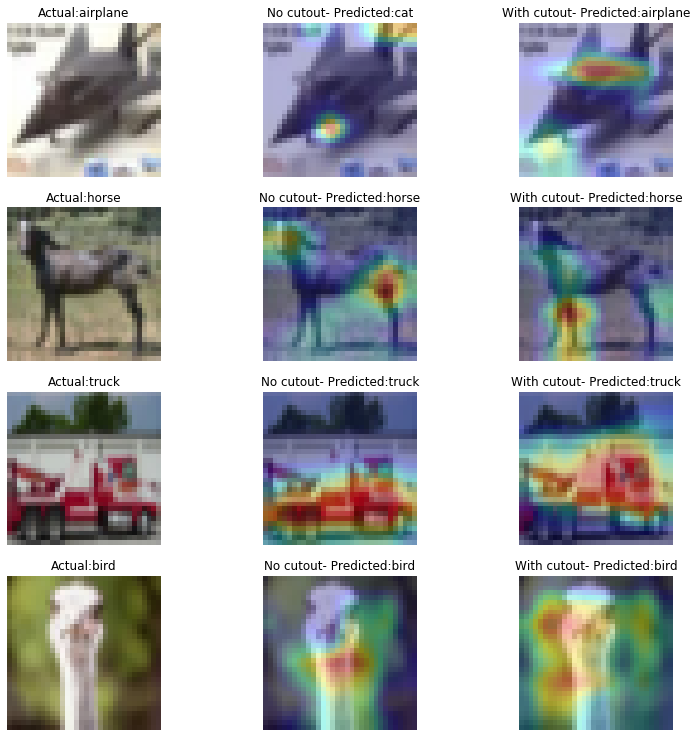

In [31]:
# Randomly select an image Id apply gradCam on this for both the models (with and without cutout)
# show original and superimposed images side-by-side. Repeat this "numImages" times

class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']

numImages = 4

# Generate 'numImages'rows by 3 cols sized image grid 
f, axarr = plt.subplots(numImages,3)

for i in range(numImages):
  # get a random integer as image id
  imgIndex = np.random.randint(0,test_features2.shape[0])

  actualClass = class_names[test_labels2[imgIndex][0]]
  
  
  axarr[i][0].imshow(test_features2[imgIndex])
  axarr[i][0].set_title('Actual:{}'.format(actualClass),fontsize=12)
  axarr[i][0].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass1 = class_names[class_idx]
  axarr[i][1].imshow(getGradCamImage(model1,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][1].set_title('No cutout- Predicted:{}'.format(predictedClass1),fontsize=12)
  axarr[i][1].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model2.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass2 = class_names[class_idx]
  axarr[i][2].imshow(getGradCamImage(model2,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][2].set_title('With cutout- Predicted:{}'.format(predictedClass2),fontsize=12)
  axarr[i][2].axis('off')
            
    
f.subplots_adjust(hspace=0.2)
f.set_size_inches(13,13)    


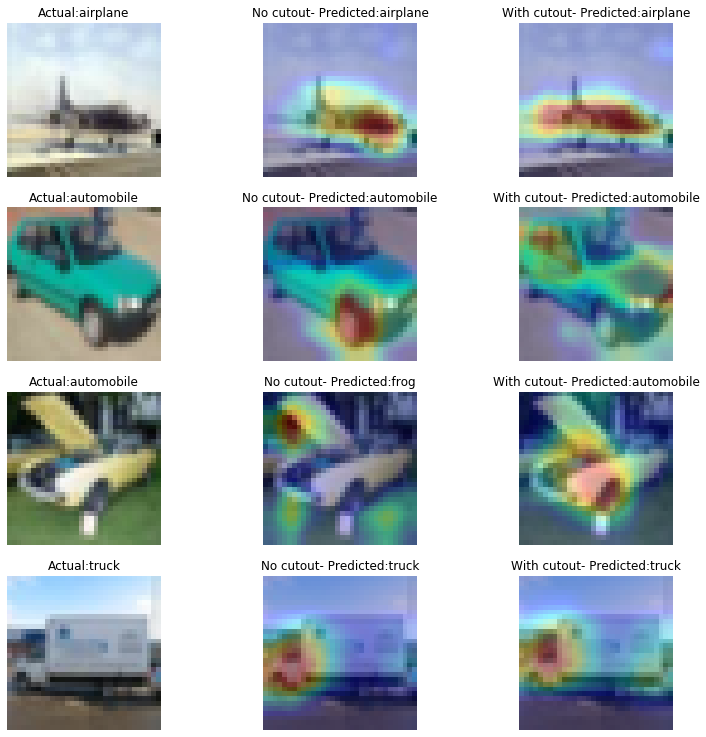

In [35]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

numImages = 4

# Generate a rows x cols sized image grid 
f, axarr = plt.subplots(numImages,3)

for i in range(numImages):
  imgIndex = np.random.randint(0,test_features2.shape[0])

  actualClass = class_names[test_labels2[imgIndex][0]]
  
  
  axarr[i][0].imshow(test_features2[imgIndex])
  axarr[i][0].set_title('Actual:{}'.format(actualClass),fontsize=12)
  axarr[i][0].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass1 = class_names[class_idx]
  axarr[i][1].imshow(getGradCamImage(model1,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][1].set_title('No cutout- Predicted:{}'.format(predictedClass1),fontsize=12)
  axarr[i][1].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model2.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass2 = class_names[class_idx]
  axarr[i][2].imshow(getGradCamImage(model2,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][2].set_title('With cutout- Predicted:{}'.format(predictedClass2),fontsize=12)
  axarr[i][2].axis('off')
            
    
f.subplots_adjust(hspace=0.2)
f.set_size_inches(13,13)    


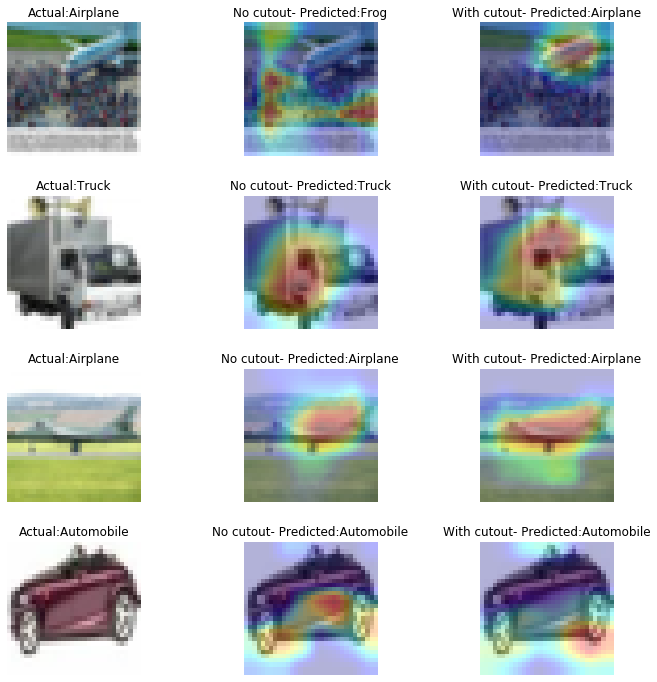

In [41]:
class_names = ['Airplane','Automobile','Bird','Cat','Deer',
               'Dog','Frog','Horse','Ship','Truck']

numImages = 4

# Generate a rows x cols sized image grid 
f, axarr = plt.subplots(numImages,3)

for i in range(numImages):
  imgIndex = np.random.randint(0,test_features2.shape[0])

  actualClass = class_names[test_labels2[imgIndex][0]]
  
  
  axarr[i][0].imshow(test_features2[imgIndex])
  axarr[i][0].set_title('Actual:{}'.format(actualClass),fontsize=12)
  axarr[i][0].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model1.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass1 = class_names[class_idx]
  axarr[i][1].imshow(getGradCamImage(model1,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][1].set_title('No cutout- Predicted:{}'.format(predictedClass1),fontsize=12)
  axarr[i][1].axis('off')

  x = np.expand_dims(batchX[imgIndex], axis=0)
  preds = model2.predict(x)
  class_idx = np.argmax(preds[0])
  predictedClass2 = class_names[class_idx]
  axarr[i][2].imshow(getGradCamImage(model2,'conv2d_9',batchX,imgIndex,test_features2))
  axarr[i][2].set_title('With cutout- Predicted:{}'.format(predictedClass2),fontsize=12)
  axarr[i][2].axis('off')
            
    
f.subplots_adjust(hspace=0.3)
f.set_size_inches(12,12)    
